In [1]:
from wxpy import *

In [2]:
bot=Bot()

Getting uuid of QR code.
Please scan the QR code to log in.
Please press confirm on your phone.
Loading the contact, this may take a little while.
Login successfully as 許凯旋


In [3]:
my_friends=bot.friends()
sex_dict={'male':0,'female':0}
for friend in my_friends:
    if friend.sex==1:
        sex_dict['male']+=1
    elif friend.sex==2:
        sex_dict['female']+=1
print(sex_dict)

{'male': 299, 'female': 105}


In [4]:
# 使用一个字典统计各省好友数量
province_dict = {'北京': 0, '上海': 0, '天津': 0, '重庆': 0,
    '河北': 0, '山西': 0, '吉林': 0, '辽宁': 0, '黑龙江': 0,
    '陕西': 0, '甘肃': 0, '青海': 0, '山东': 0, '福建': 0,
    '浙江': 0, '台湾': 0, '河南': 0, '湖北': 0, '湖南': 0,
    '江西': 0, '江苏': 0, '安徽': 0, '广东': 0, '海南': 0,
    '四川': 0, '贵州': 0, '云南': 0,
    '内蒙古': 0, '新疆': 0, '宁夏': 0, '广西': 0, '西藏': 0,
    '香港': 0, '澳门': 0}

# 统计省份
for friend in my_friends:
    if friend.province in province_dict.keys():
        province_dict[friend.province] += 1

# 为了方便数据的呈现，生成JSON Array格式数据
data = []
for key, value in province_dict.items():
    data.append({'name': key, 'value': value})

print(data)

[{'name': '北京', 'value': 15}, {'name': '上海', 'value': 75}, {'name': '天津', 'value': 3}, {'name': '重庆', 'value': 2}, {'name': '河北', 'value': 2}, {'name': '山西', 'value': 0}, {'name': '吉林', 'value': 2}, {'name': '辽宁', 'value': 5}, {'name': '黑龙江', 'value': 3}, {'name': '陕西', 'value': 3}, {'name': '甘肃', 'value': 1}, {'name': '青海', 'value': 0}, {'name': '山东', 'value': 8}, {'name': '福建', 'value': 2}, {'name': '浙江', 'value': 48}, {'name': '台湾', 'value': 0}, {'name': '河南', 'value': 2}, {'name': '湖北', 'value': 3}, {'name': '湖南', 'value': 6}, {'name': '江西', 'value': 2}, {'name': '江苏', 'value': 69}, {'name': '安徽', 'value': 51}, {'name': '广东', 'value': 16}, {'name': '海南', 'value': 0}, {'name': '四川', 'value': 7}, {'name': '贵州', 'value': 0}, {'name': '云南', 'value': 0}, {'name': '内蒙古', 'value': 0}, {'name': '新疆', 'value': 0}, {'name': '宁夏', 'value': 0}, {'name': '广西', 'value': 1}, {'name': '西藏', 'value': 1}, {'name': '香港', 'value': 1}, {'name': '澳门', 'value': 1}]


In [28]:
import re
def write_txt_file(path, txt):
    '''
    写入txt文本
    '''
    with open(path, 'a', encoding='utf-8', newline='') as f:
        f.write(txt+'\n')    

# 统计签名
for friend in my_friends:
    # 对数据进行清洗，将标点符号等对词频统计造成影响的因素剔除
    pattern = re.compile(r'[一-龥]+')
    filterdata = re.findall(pattern, friend.signature)
    write_txt_file('signatures.txt', ''.join(filterdata))

In [14]:
def read_txt_file(path):
    '''
    读取txt文本
    '''
    with open(path, 'r', encoding='utf-8', newline='') as f:
        return f.read()

In [18]:
import jieba
import numpy
import pandas as pd
import wordcloud
import scipy

In [29]:
content = read_txt_file('signatures.txt')
segment = jieba.lcut(content)
words_df=pd.DataFrame({'segment':segment})

stopwords=pd.read_csv("stopwords.txt",index_col=False,quoting=3,sep=" ",names=['stopword'],encoding='gb18030')
words_df=words_df[~words_df.segment.isin(stopwords.stopword)]

In [30]:
#词频统计
import numpy

words_stat = words_df.groupby(by=['segment'])['segment'].agg({"计数":numpy.size})
words_stat = words_stat.reset_index().sort_values(by=["计数"],ascending=False)

c:\python3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


In [25]:

import matplotlib.pyplot as plt

c:\python3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


{'\n': 428, '一个': 9, '爱': 8, '人生': 8, '好': 7, '生活': 7, '世界': 6, '努力': 5, '路': 5, '想': 5, '不知': 5, '事': 5, '岁月': 4, '喜欢': 4, '时间': 4, '请': 4, '到底': 3, '朋友圈': 3, '不由': 3, '走': 3, '路上': 3, '生命': 3, '自然': 3, '否': 3, '吾': 3, '读书': 3, '幻想': 3, '幸福': 3, '回头': 3, '工作': 3, '越': 3, '向前走': 2, '轻松': 2, '告诉': 2, '怨': 2, '情': 2, '盛开': 2, '亦': 2, '快乐': 2, '完美': 2, '唯有': 2, '真': 2, '脚步': 2, '号': 2, '没': 2, '年华': 2, '屏蔽': 2, '温柔': 2, '希望': 2, '加油': 2, '平凡': 2, '行': 2, '无': 2, '苦': 2, '自强不息': 2, '天下': 2, '深情': 2, '舍得': 2, '厚德载物': 2, '自来': 2, '微信': 2, '愿': 2, '珍惜': 2, '一条': 2, '梦想': 2, '明日': 2, '更好': 2, '梦': 2, '陪': 2, '晚上': 2, '旧': 2, '签名': 2, '青春': 2, '手': 2, '妥协': 2, '敬畏': 2, '奔跑': 2, '长大': 2, '暂时': 2, '终老': 2, '日子': 2, '回答': 2, '一步': 2, '痛苦': 2, '知行合一': 2, '一花': 2, '懂': 2, '放': 2, '收到': 2, '控制': 2, '懒': 2, '略': 1, '留在': 1, '爱笑': 1, '皮皮': 1, '爱着': 1, '熊': 1, '潜龙勿用': 1, '疼': 1, '灯具': 1}


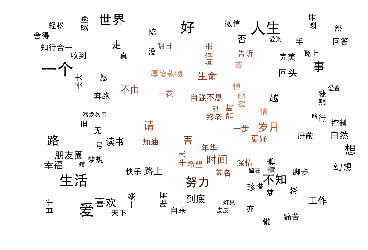

In [32]:
from scipy.misc import imread
from wordcloud import WordCloud, ImageColorGenerator


# 设置词云属性
color_mask = imread('lq.jpg')
wordcloud = WordCloud(font_path="simhei.ttf",   # 设置字体可以显示中文
                background_color="white",       # 背景颜色
                max_words=100,                  # 词云显示的最大词数
                mask=color_mask,                # 设置背景图片
                max_font_size=100,              # 字体最大值
                random_state=42,
                width=1000, height=860, margin=2,# 设置图片默认的大小,但是如果使用背景图片的话,                                                   # 那么保存的图片大小将会按照其大小保存,margin为词语边缘距离
                )

# 生成词云, 可以用generate输入全部文本,也可以我们计算好词频后使用generate_from_frequencies函数
word_frequence = {x[0]:x[1]for x in words_stat.head(100).values}
print(word_frequence)
word_frequence_dict = {}
for key in word_frequence:
    word_frequence_dict[key] = word_frequence[key]

wordcloud.generate_from_frequencies(word_frequence_dict)
# 从背景图片生成颜色值  
image_colors = ImageColorGenerator(color_mask) 
# 重新上色
wordcloud.recolor(color_func=image_colors)
# 保存图片
wordcloud.to_file('output.png')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()